# Explore here

In [3]:
# Your code here

import os
import pandas as pd

data = pd.read_csv("../data/raw/housing.csv")
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:

data_fin = data.drop(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], axis=1) 
data_fin.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data_fin, test_size=0.2, random_state=42)

# Display the results
print("Training Set:")
print(X_train)
print("\nTesting Set:")
print(X_test)

Training Set:
       MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80
...       ...       ...        ...
11284  6.3700     33.78    -117.96
11964  3.0500     34.02    -117.43
5390   2.9344     34.03    -118.38
860    5.7192     37.58    -121.96
15795  2.5755     37.77    -122.42

[16512 rows x 3 columns]

Testing Set:
       MedInc  Latitude  Longitude
20046  1.6812     36.06    -119.01
3024   2.5313     35.14    -119.46
15663  3.4801     37.80    -122.44
20484  5.7376     34.28    -118.72
9814   3.7250     36.62    -121.93
...       ...       ...        ...
15362  4.6050     33.36    -117.22
16623  2.7266     35.36    -120.83
18086  9.2298     37.31    -122.05
2144   2.7850     36.77    -119.76
3665   3.5521     34.22    -118.37

[4128 rows x 3 columns]


In [31]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

# Get the cluster labels for each data point
X_train['Cluster'] = model.labels_
y_train = list(model.labels_)
X_train["Cluster"] = y_train
X_train.head()

# Get the cluster centroids
centroids = model.cluster_centers_

# Display the centroids
print("Cluster Centroids:\n", centroids)

X_train.head()


# predicciones

Cluster Centroids:
 [[ 5.38015845e+00  3.76869246e+01 -1.21915650e+02 -7.41628980e-14]
 [ 4.34802566e+00  3.38894142e+01 -1.18002840e+02  1.00000000e+00]
 [ 1.17487341e+01  3.58781707e+01 -1.20284228e+02  4.00000000e+00]
 [ 2.74057153e+00  3.81437420e+01 -1.21623042e+02  5.00000000e+00]
 [ 6.93947578e+00  3.38496797e+01 -1.18041547e+02  2.00000000e+00]
 [ 2.42837555e+00  3.40415568e+01 -1.18024263e+02  3.00000000e+00]]


,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,5
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,5
2271,3.5542,36.78,-119.80,3


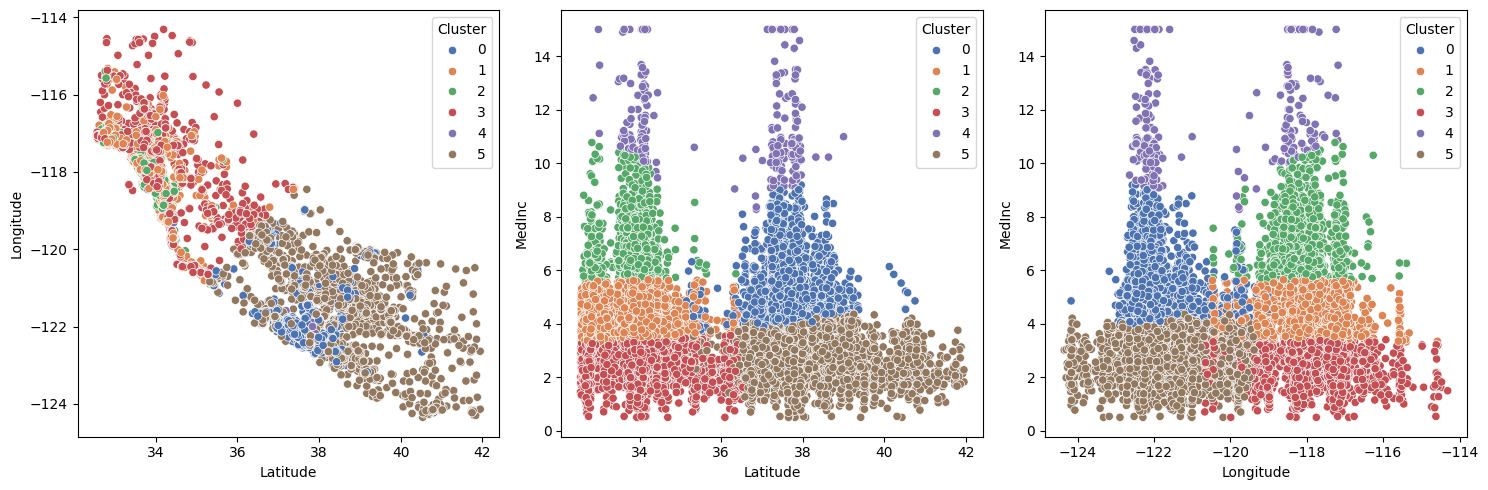

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.tight_layout()

plt.show()


In [29]:
# prediccion 

y_test = model.predict(X_test)
X_test['Cluster'] = y_test
X_test.head()




,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


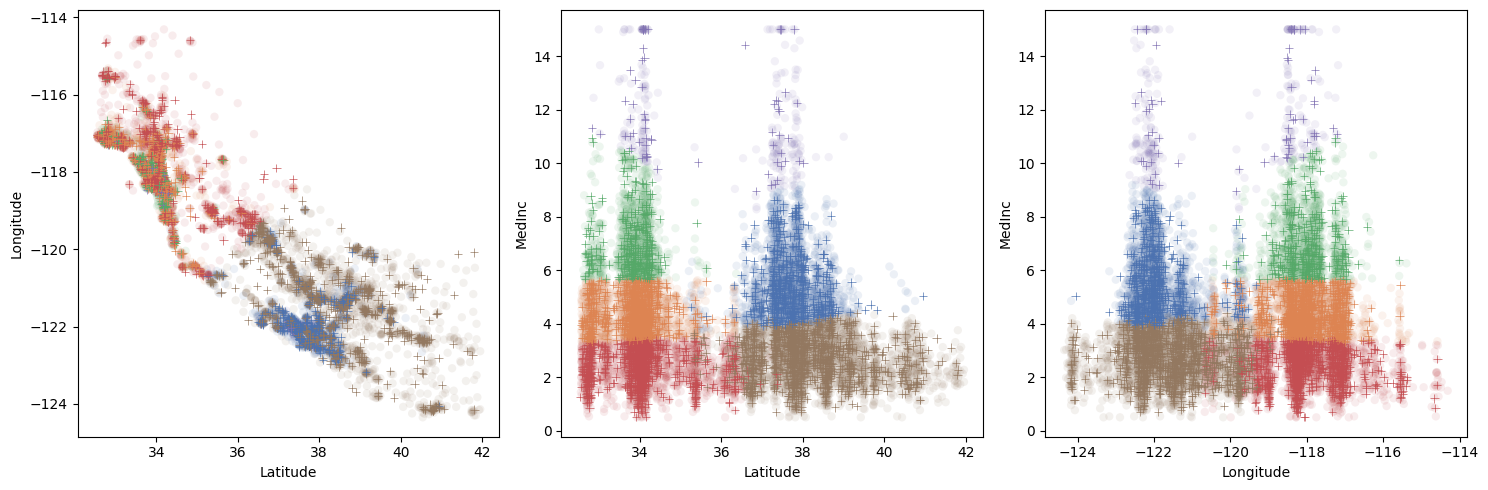

In [30]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model_sup = RandomForestClassifier(random_state=42)
model_sup.fit(X_train, y_train)

predi = model_sup.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predi))
print("Classification Report:")
print(classification_report(y_test, predi))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       983
           2       1.00      1.00      1.00       299
           3       1.00      1.00      1.00      1111
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00      1112

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128



ACCURACY = 1
EL MODELO ES PERFECTO